## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_data_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep = False) == True]
duplicate_mouse_id["Mouse ID"]

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df.loc[combined_data_df['Mouse ID'] != 'g989']    

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_data_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = clean_data_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = clean_data_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
st_dev = clean_data_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = clean_data_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({"Mean Tumor Volume" : mean,
                          "Median Tumor Volume" : median,
                          "Variance of Tumor Volume" : variance,
                          "St. Dev. Tumor Volume" : st_dev,
                          "St. Error Tumor Volume" : sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,St. Dev. Tumor Volume,St. Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

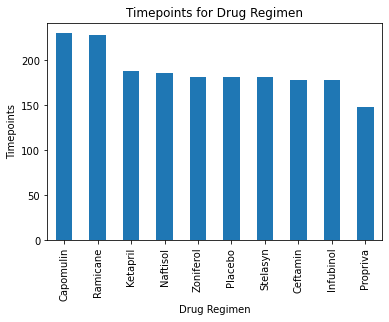

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Create a group based on the values in the 'maker' column
regim_plot = clean_data_df['Drug Regimen'].value_counts()
regim_plot.plot(kind="bar")
plt.title("Timepoints for Drug Regimen")
plt.ylabel("Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

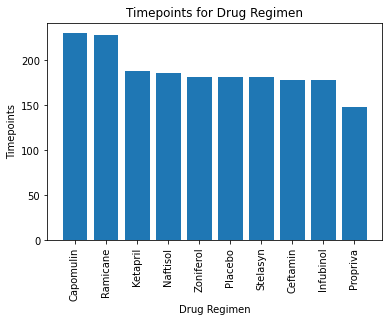

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

regim_plot = clean_data_df['Drug Regimen'].value_counts()
plt.bar(regim_plot.index.values, regim_plot.values)
plt.title("Timepoints for Drug Regimen")
plt.ylabel("Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 'vertical')
plt.show()

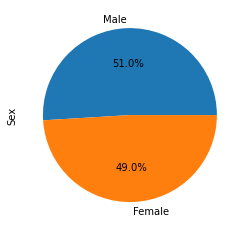

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_plot = clean_data_df['Sex'].value_counts()
gender_plot.plot(kind='pie', autopct="%1.1f%%")
plt.show()


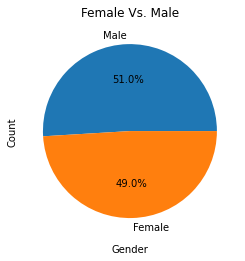

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plot_py = clean_data_df['Sex'].value_counts()
plt.pie(gender_plot_py.values, labels = gender_plot_py.index.values, autopct="%1.1f%%")
plt.title("Female Vs. Male")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.xticks(rotation = 'vertical')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
updated_clean = pd.merge(clean_data_df, last_timepoint, on=('Mouse ID', 'Timepoint'), how = "right")
updated_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments = clean_data_df["Drug Regimen"].unique()

drug_treatments = drug_treatments[:4]

# Create empty list to fill with tumor vol data (for plotting)
treatment_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_treatments:
    final_drug_df = updated_clean.loc[updated_clean["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    
    # add subset 
    treatment_list.append(final_drug_df)
    
    # Determine outliers using upper and lower bounds
quartiles = final_drug_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 30.15582196999999 could be outliers.
Values above 90.92136789000001 could be outliers.


In [42]:
drug_treatments

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo'], dtype=object)

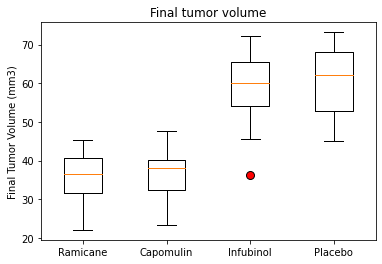

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outliers = dict(markerfacecolor='red', markersize=8)
plt.boxplot(treatment_list, labels=drug_treatments, flierprops=outliers)
plt.title('Final tumor volume')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

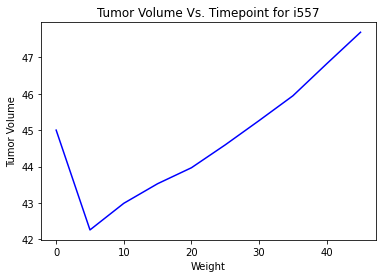

In [56]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']
mouse_capo = capomulin_data.loc[capomulin_data['Mouse ID'] == 'i557']
plt.plot(mouse_capo['Timepoint'], mouse_capo['Tumor Volume (mm3)'], color="blue")
plt.title('Tumor Volume Vs. Timepoint for i557')
plt.ylabel('Tumor Volume')
plt.show

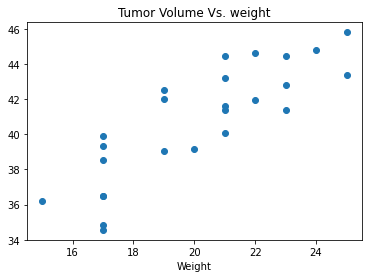

In [57]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_aver = capomulin_data.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_aver['Weight (g)'], capomulin_aver['Tumor Volume (mm3)'])
plt.title('Tumor Volume Vs. weight')
plt.xlabel('Weight')
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
